In [3]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load Data
df = pd.read_csv('netflix_titles_2021.csv')

In [5]:
# Display the first few rows of the dataframe
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [481]:
# Data Cleaning

# Check for missing values and handle them appropriately, Explore the data types of each column and ensure they are correct.
missing_values = df.isnull().sum()

df['director'].fillna('Unknown', inplace = True)
df['date_added'].ffill(inplace = True)
df['rating'].bfill(inplace = True)
df['duration'].bfill(inplace = True)
df.dropna(how = 'any', inplace = True)

missing_values

show_id            0
type               0
title              0
director           0
cast               0
country            0
date_added         0
release_year       0
duration           0
listed_in          0
description        0
rating             0
duration_in_min    0
month_added        0
day_added          0
dtype: int64

In [313]:
# Columns modification as per Karna Sir
df.drop(columns=['rating'], inplace=True)

df['rating'] = np.random.randint(3, 6, size=len(df))

df

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description,rating
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",3
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,4
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",3
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,3
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,4
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,3
15,s16,TV Show,Dear White People,Unknown,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,4
17,s18,TV Show,Falsa identidad,Unknown,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...,5
21,s22,TV Show,Resurrection: Ertugrul,Unknown,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...,4
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,5


In [316]:
# Identify and handle any outliers or anomalies.
ry_q1 = np.percentile(df['release_year'], 25)
ry_q3 = np.percentile(df['release_year'], 75)

r_q1 = np.percentile(df['rating'], 25)
r_q3 = np.percentile(df['rating'], 75)

In [319]:
# Data Understanding:

# Describe the dataset(After correction) -> 
df.info() 

# Rows -> 7305
# Columns -> 12
# Object Type -> show_id, type, title, director, cast, country, date_added, rating, duration, listed_in, description
# Int Type -> release_year
# Null columns -> 0


# Summarize the central tendency and dispersion of numerical features
df.describe()

# Release year

# Mean 2013.696509
# Median 2017.0
# Standard Deviation 8.856206

# Rating

# Mean 4.001232
# Median 4.0
# Standard Deviation 0.817138

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7305 entries, 1 to 8806
Data columns (total 12 columns):
show_id         7305 non-null object
type            7305 non-null object
title           7305 non-null object
director        7305 non-null object
cast            7305 non-null object
country         7305 non-null object
date_added      7305 non-null object
release_year    7305 non-null int64
duration        7305 non-null object
listed_in       7305 non-null object
description     7305 non-null object
rating          7305 non-null int64
dtypes: int64(2), object(10)
memory usage: 741.9+ KB


,release_year,rating
count,7305.000000,7305.000000
mean,2013.696509,4.001232
std,8.856206,0.817138
min,1942.000000,3.000000
25%,2013.000000,3.000000
50%,2017.000000,4.000000
75%,2019.000000,5.000000
max,2021.000000,5.000000


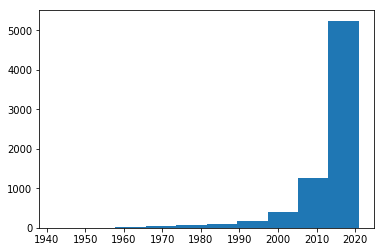

In [322]:
# Data Exploration and Visualization

# Create histograms to visualize the distribution of numerical features.
plt.hist(df['release_year'])
plt.show()

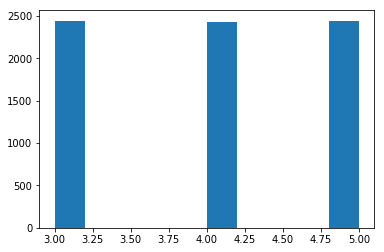

In [482]:
# Create histograms to visualize the distribution of numerical features.
plt.hist(df['rating'])
plt.show()

([<matplotlib.patches.Wedge at 0x7fb40226ef90>,
 [Text(-0.708937,0.841076,'Movie'), Text(0.708937,-0.841076,'TV Show')],
 [Text(-0.386693,0.458769,'72.3%'), Text(0.386693,-0.458769,'27.7%')])

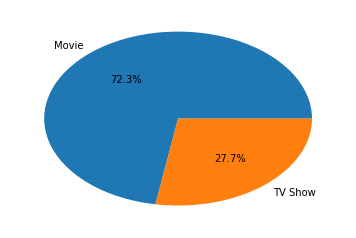

In [218]:
# Visualize the distribution of categorical features (e.g., 'Category' and 'City') using bar charts or pie charts to understand the frequency of each category.

# 1. Release percentage of different type of data i.e. Movie/ TV show

type_counts = df['type'].value_counts().reset_index()
type_counts.rename(columns = {'index' : 'Type', 'type' : 'Count'}, inplace= True)

values = type_counts['Count'].to_list()
label = type_counts['Type'].to_list()

plt.pie(type_counts['Count'], labels=type_counts['Type'], autopct='%1.1f%%')
plt.show()

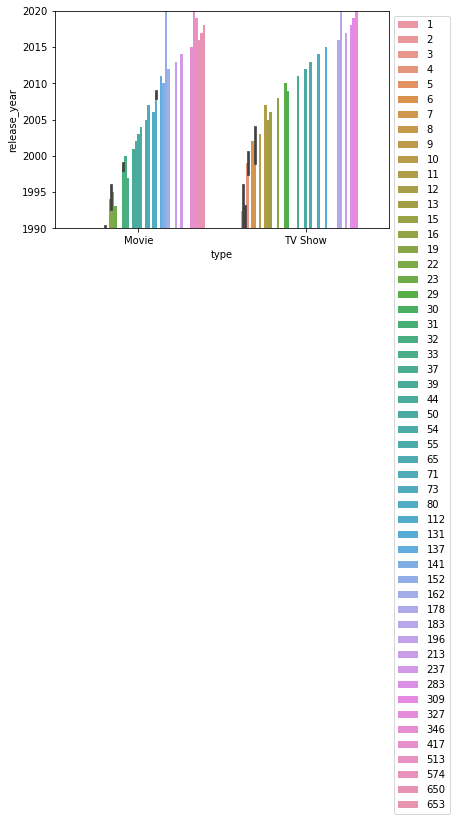

In [307]:
# 2. Comparison of count of movie/tv show release in year

data_count = df.groupby(['type', 'release_year'], as_index=False).size().reset_index()
# mtype = data_count['type']
# rel_y = data_count['release_year']

data_count

sns.barplot(x = 'type', y = 'release_year', data = data_count, hue = 0)
plt.legend(bbox_to_anchor = (1,1))
plt.ylim(1990, 2020)  # Set the limits of the y-axis
plt.yticks(range(1990, 2021, 5))
plt.show()

In [327]:
# Use boxplots to compare distributions across different groups or categories.
ry_count = df.groupby(['type', 'release_year'], as_index=False).size().reset_index()
rating_count = df.groupby(['type', 'rating'], as_index=False).size().reset_index()


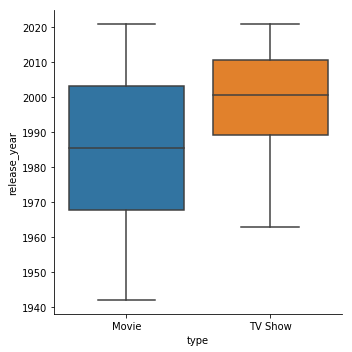

In [328]:
# Type & Release year box plot
sns.catplot(x = 'type', y = 'release_year', data = ry_count, kind = 'box')
plt.show()

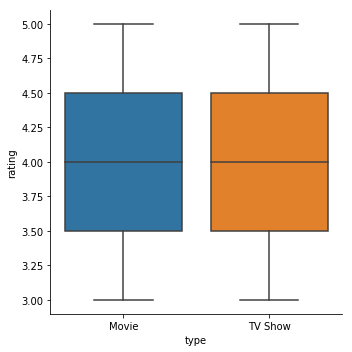

In [329]:
# Type & Rating year box plot
sns.catplot(x = 'type', y = 'rating', data = rating_count, kind = 'box')
plt.show()

In [344]:
def convert_tv_duration(duration):
    if 'season' in duration.lower():
        num_seasons = int(duration.split()[0])
        return num_seasons * 140  # Assuming 1 season = 140 minutes
    return None

# Function to convert movie duration to minutes
def convert_movie_duration(duration):
    if 'min' in duration.lower():
        return int(duration.split()[0])
    return None

df['duration_in_min'] = df.apply(
    lambda row: convert_tv_duration(row['duration']) if row['type'] == 'TV Show' 
    else convert_movie_duration(row['duration']), axis=1
)

df

,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,description,rating,duration_in_min
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",3,280.0
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,4,280.0
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",3,125.0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,3,1260.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,4,104.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,3,127.0
15,s16,TV Show,Dear White People,Unknown,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...,4,560.0
17,s18,TV Show,Falsa identidad,Unknown,"Luis Ernesto Franco, Camila Sodi, Sergio Goyri...",Mexico,"September 22, 2021",2020,2 Seasons,"Crime TV Shows, Spanish-Language TV Shows, TV ...",Strangers Diego and Isabel flee their home in ...,5,280.0
21,s22,TV Show,Resurrection: Ertugrul,Unknown,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...,4,700.0
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,5,166.0


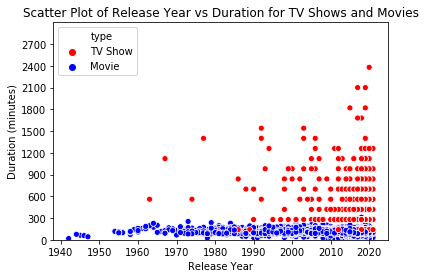

In [352]:
# Explore relationships between variables using scatter plots or correlation matrices.
sns.scatterplot(x = 'release_year', y = 'duration_in_min', hue = 'type', data = df, palette= {'TV Show': 'Red', 'Movie': 'Blue'})
plt.ylim(0, 3000)
plt.yticks(range(0, 3000, 300))
plt.title('Scatter Plot of Release Year vs Duration for TV Shows and Movies')
plt.xlabel('Release Year')
plt.ylabel('Duration (minutes)')

plt.show()

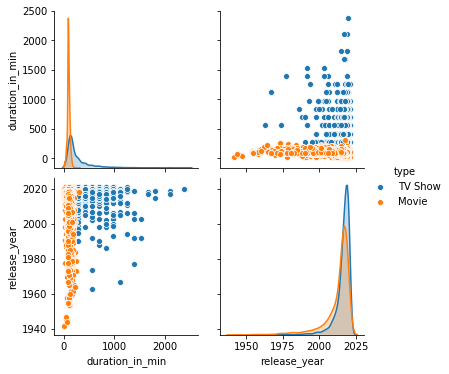

In [355]:
# Employ Seaborn to create more advanced visualizations like pairplots, heatmaps, etc.
sns.pairplot(df, hue='type', vars=['duration_in_min', 'release_year'])
plt.show()

In [ ]:
# Insights and Conclusion:
# Summarize key findings from the EDA.

# 1. As per the analysis between year 2012 - 2020 there was vast development of movies and tv show in total around
#    5000+ which is a huge number and before 2010 the movie and tv show development rate was below 1500

# 2. More analysis was done and found that irrespective of TV Shows the movies development count is fare more than 
#    that the TV shows are summing up to around 2000 where as Movies summing up to around 5200 i.e. more than double
#    of TV shows on netflix

# 3. Movies on netflix are 72.3% where as TV Show are only 27.7% which is a bit very low.

# 4. As per analysis between 2000-2005 lots of movies were introduced in netflix as compared to TV show and after 2005
#    the drift was there and lesser movies were introduced after that in years 2010-2015 movies got spiked up and then
#    again the drift was there till 2015 and after 2015 it got spiked up to max introduction of movies where TV shows
#    introduction was on average basis and it followed a uniform homogeneous pattern throughout.

# 5. Before 1965 there was not much exposure to TV shows and after 1965 very few tv shows were getting introduced and the duration
#    was mostly between 0-300 minutes but after 1995 it got spiked and a lot more TV shows were introduced where
#    maximum of TV shows were of duration 250-1200 minutes and moderate amount TV shows were of high duration between
#    1200-1500. Also one more interesting thing is that after 2015 the TV shows were introduced whose duration vent over to be
#    more than 1500-2400 in 2020 so we can say TV Shows can beat movies in future

# 6. New point unlocked in analysis is that most movies having duration 0-300 min are presents and the tv show were 
#    also of less duration initially but the movies duration are following a homogeneous duration structure
#    from 0-300 mins not more than that where as initial TV show were not so popular but later it got introduced in
#    a huge amount which means people of this generation are also inclined towards TV shows along with movies.

# 7. Apart from this coming on to rating part so mostly TV Shows and Movies are on same place when it comes to rating
#    the rating lies max within 3.5 to 4.5.


In [480]:
# Questions:
# 1. Analyze the growth of Movies and TV Shows over the years. Has the addition of new content been consistent, or are there periods of significant increase or decrease?

# Ans: Movies introduction was since 1942 but that time TV show were not introduced and people were more familiar to
#      movies rather than TV shows till 1964 but afterwards very few TV Shows came into play. Generally Movies followed
#      a trend of having its duration between 0-300 min throughout but TV Shows initially had duration between 300-1000 
#      mins. But as years passed after 1965 TV Show took a strong curve on graph and large amount of TV SHows were
#      introduced and the graph kept on increasing but movies followed a more homogeneous trend.

# Reference - Refer In[322] chart

# 2. Explore the distribution of listed_in genres. Which genres are most prevalent, and is there a difference in genre distribution between Movies and TV Shows?

# Ans: As per the analysis the most prevalent genre is 'Dramas, International Movies' but there is definitely
#     a difference in the genre popularity for movies and tv shows. Most people like to watch movies that are full of
#     'Dramas, International Movies' and coming on to TV shows mostly tv shows are watch having genre 'Kids TV' which
#     means that tv shows mostly are targeting the kids section.

# Reference - df.groupby(['type', 'listed_in']).size().reset_index().sort_values(0, ascending=False)
    
# 3. Analyze the distribution of content across different country of origin. Are there dominant countries or regions contributing to the Netflix library?

# Ans: Mostly the distribution of content across countries varies. But as per the analysis I have found that 
#      'United States' has contributed max to Netflix library and is the dominating once as well followed by
#      'India' on second position and 'United Kingdom' at third position.

# Reference - df['country'].value_counts().reset_index().sort_values('country', ascending=False)

# 4. Explore the distribution of duration for both Movies and TV Shows. Are there any noticeable trends or differences in content length?

# Ans: Before 1965 there was not much exposure to TV shows and after 1965 very few tv shows were getting introduced 
#      and the duration was mostly between 0-300 minutes but after 1995 it got spiked and a lot more TV shows 
#      were introduced where maximum of TV shows were of duration 250-1200 minutes and moderate amount TV shows 
#      were of high duration between 1200-1500. Also one more interesting thing is that after 2015 the TV shows were 
#      introduced whose duration vent over to be more than 1500-2400 in 2020 so we can say TV Shows can beat 
#      movies in future

# Reference - Refer In[352] chart

# 5. Analyze the distribution of content across different rating categories. Are certain rating categories more prevalent than others?

# Ans: Analysis showed that since movies exposure has been more over time so mostly rating are done for movies
#      mostly people as per the data rated movies to 5 i.e. counts up to 1806 followed by rating 4 having count
#      1726 and last but not least we have rating 3 with count 1749.
    
#      Coming on to TV Show the max people rated it as 4 having count 702 followed by rating 3 i.e. 685 and at last
#      rating 5 with count 637.
    
# Reference - df.groupby(['type', 'rating']).size()

# 6. Investigate the number of titles released each year (release_year). Are there any patterns or significant changes in the volume of releases over time?

# Ans: Initially in 1944 the number of titles release was 1 but as the year growth took place the volume kept on 
#      increasing hitting the target to more than 100 in 2008. In release year 2016 there was a new hit to the 
#      volumes released and it increased from 477 to 752 that was a huge growth which mean 2016 was a turning point.
#      The growth went till 2019 but afterwards due to covid the growth went down to from 936 in 2018 to 744 in 2020
#      followed by 355 volumes in 2021 which was a huge drastic change.

# Reference - df['release_year'].value_counts().reset_index().sort_values('index', ascending=False)

# 7. Analyze the distribution of content added to Netflix over different months or quarters. Are there periods with higher content addition activity?

# Ans: Most content was delivered in december month followed by Jan again back to Oct at third position. So as per
#      analysis there was a observation that mostly the content or volumes were added either at the beginning months
#      of year of the ending months of years rest in between the content delivery is moderate   
    
# Reference ->

# df['date'] = pd.to_datetime(df['date_added'])
# df['month_added'] = df['date'].dt.month
# df.drop(['date'], axis = 1, inplace=True)
# df['month_added'].value_counts().reset_index().sort_values('month_added', ascending=False)


# 8. Explore whether there are any patterns in the date_added for new content in terms of specific days of the week.

# Ans: As per the below reference I have done manually, We can observe the most content is delivery on day 1 of the 
#      week after that in the middle of month so the trend is that mostly the content is delivered around date 
#      1, 15, 30.    

# Reference -> 

# df['date'] = pd.to_datetime(df['date_added'])
# df['day_added'] = df['date'].dt.day
# df.drop(['date'], axis = 1, inplace=True)
# df['day_added'].value_counts().reset_index().sort_values('day_added', ascending=False)


# 9. Identify the most frequent directors on the platform and explore the distribution of their content across different genres and rating categories.

# Ans: Most frequent directors are A. L. Vijay, Fernando Ayllón, Jay Karas, Makarand Mane, Malcolm D. Lee, Malik 
#     Bendjelloul etc. now as per the distribution the top rating genre for the above directors is mainly for
#     Dramas, Comedies, International Movies. Also the distribution is dependent on this genre because 
#     mostly the director having genre Comedies, Dramas, International Movies are getting the highest rating of 5.
#     The mentioned genre have dependency on rating.

# Reference - 
# df.groupby(['director', 'listed_in', 'rating']).size().reset_index().sort_values('rating', ascending=False)  

# 10. Analyze how the popularity of different genres (listed_in) has changed over time. Are there genres that have become more or less prevalent in recent years?

# Ans: The most popular genre is the 'Stand-Up Comedy', as per distribution initial times the genre were not having 
#     that much popularity and after times increase but as the time goes forward near 2018 we are having the max 
#     popularity given to StandUp comedy and again time came forward we were again having a downward trend afterwards

# Reference - df.groupby(['listed_in', 'release_year']).size().reset_index().sort_values(0, ascending=False)

# 11. Explore any potential relationship between content duration and its average rating. Do longer or shorter movies/shows tend to receive higher or lower ratings?

# Ans: The relationship between content duration and average rating is directly dependent the content whose rating is
#     around 3 it having duration between 8min to around 1 hour. Where as as the duration goes up the rating also 
#     improved so as per distribution content with rating 5 is 13 min to 2380 mins.

# 12. Analyze whether there is any correlation between the content rating and the country of origin. Do certain countries produce content with specific rating tendencies?

# Ans: In different countries, we have observed a trend that from this data is that generally across countries
#      people rates content to a rating of 4 as per my observations. US having max count for rating 4 i.e. 850, 819
#      for rating 3, 818 for 5 UK with 12 counts, Japan with 81 counts for rating 4, 80 for 3 and 79 for 5
    
# Reference - df.groupby(['country', 'rating']).size().reset_index().sort_values(0, ascending=False)
    

# 13. Explore whether specific directors are associated with particular genres or content types.

# Ans: 'Raúl Campos, Jan Suter' directed movies 18 times i.e. the max time on genre 'Stand-Up Comedy'
#      and we can see that he is totally associate with the genre, followed by 'Marcus Raboy' again a movie
#      director delivering content 14 times in the same genre, followed by Jay karas providing content in the same genre
#      13 times. So we can say yes there's a relation between them.


# Reference - dff = df.groupby(['director', 'listed_in', 'type']).size().reset_index().sort_values(0, ascending=False)
# dff[dff['director'] != 'Unknown']

